#  <span style="color:#084B8A; font-weight:bold">NETWORK &amp; WEB SCIENCE</span>
###  <span style="color:#084B8A; font-weight:bold">Teilleistung: Übungsbeispiel</span>
<br/>

Informationen: 
* Dokumentation: [networkx.org](https://networkx.org/documentation/stable/tutorial.html).
* Dokumentation: [pandas.org](https://pandas.pydata.org/docs/)


In [16]:
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import numpy as np    # für mathematische Operationen
import pandas as pd   # Einlesen eines Dataframes
import scipy

## <span style="color:#084B8A; font-weight:bold">1 Daten</span>

* Library _pandas_ (mit ``pd.read_csv()``): Einlesen von Textdateien oder csv-Dateien. Automatisch werden sie zu einem Pandas-Dataframe konvertiert. 
* Library _pyreadr_ (mit ``read_r()``): Einlesen von R-Daten. Das Objekt ist aber nicht direkt zu verwenden, sondern sie muss noch in ein Dataframe umgewandelt werden (``NAMEdesOBJEKTES['data']``).

<div class="alert alert-block alert-info">
    <p><b>Aufgabe 1: Einlesen der Daten & Überblick</b></p>
    <ol>
        <li>Lesen Sie die Dateien <i>facebook_combined.txt</i> mit der Funktion <code>pandas::read_csv()</code> ein. Geben Sie dabei den Variablen die Namen "start_node" und "end_note". Die einzelnen Spalten sind mit einem Leerzeichen getrennt.</li>
        <li>Geben Sie den Typ des Objektes (<code>type()</code>), die ersten 10 Zeilen aus (<code>.head(n)</code>) und die Dimension (<code>.shape</code>) aus.</li>
    </ol>
</div>

In [17]:
# Aufgabe 1: Einlesen einer txt- oder csv-Datei

data = pd.read_csv("data/facebook_combined.txt", sep=' ', names=["start_node", "end_node"])

In [18]:
# Aufgabe 1: Typ, ersten 10 Zeilen, Dimension

data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88234 entries, 0 to 88233
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   start_node  88234 non-null  int64
 1   end_node    88234 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB


,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
5,0,6
6,0,7
7,0,8
8,0,9
9,0,10


##  <span style="color:#084B8A; font-weight:bold">2 Erzeugen des Graphen</span>

Das Dataframe ist bereits eine gute Liste für die Erstellung eines ungerichteten Graphen, und zwar findet man im Dataframe alle aktuellen Kanten. 

Für die Aufgabenstellung sollen Teilgraphen untersucht werden. Dazu werden aus dem Datensatz 5000 Zeilen mit der Methode `.sample(n, random_state)` extrahiert. Der Parameter `n` gibt die Anzahl der Zeilen an, mit dem Parameter `random_state` werden dieselben Zeilen bei einer Wiederholung ausgewählt (ist für die gemeinsame Arbeit bzw. für die Nachvollziehbarkeit notwendig).

Bedingungen für `random_state`
* Nehmen Sie von allen Mitgliedern Ihrer Gruppe die letzte Ziffer der Matrikelnummer.
* Kombinieren Sie die letzten Ziffern nach der alphabetischen Reihenfolge Ihrer Vornamen.
* Geben Sie diese Nummer an.

In [19]:
# Auswahl der Zeilen pro Gruppe
number = 8271
subdata = data.sample(n=5000, random_state=number)

## <span style="color:#084B8A; font-weight:bold">3 Netzwerkanalyse</span>
<div class="alert alert-block alert-warning">
    <p><b>TEILLEISTUNG: Aufgabenstellung</b></p>
    <ol>
    <li>Erstellen Sie einen ungerichteten Graphen und geben Sie die wesentlichen Informationen zum Graphen aus.</li>
    <li>
        <p> Führen Sie eine <b>Netzwerkanalyse</b> durch. Sie können alle Analysemethoden der letzten Einheiten verwenden, wichtig ist, dass Sie die Ergebnisse interpretieren und analysieren.</p>
       <p>Folgende Fragen können eine Hilfe sein, aber es ist natürlich nicht ausreichend, nur diese zu beantworten:</p>
            <ul>
                <li>Gibt es Zusammenhangskomponenten und wenn ja, wie viele? Welche Personen sind in diesen Zusammenhangskomponenten?</li>
                <li>Wie dicht ist das Netzwerk?</li>
                <li>Gibt es Personen, die mit sehr vielen anderen verbunden sind?</li>
                <li>Gibt es isolierte Personen? Gibt es (lokale) Brücken?</li>
                <li>Wenn man Personen entfernt, was passiert mit dem Netzwerk und dem Zusammenhang?</li>
                <li>Was passsiert, wenn man eine oder mehrere Zusammenhangskomponenten entfernt?</li>
                <li>Gibt es Gruppierungen? Wie unterscheiden sich diese?</li>
                <li>Wie können Sie ein so großes Netzwerk visualisieren, so dass noch etwas erkennbar ist?</li>
            </ul>
    </li>
    <li>Geben Sie zum Schluss noch eine Zusammenfassung Ihrer Ergebnisse und eine übergreifende Interpretation. Achten Sie darauf, dass diese ausführlich und schlüssig, denn diese wird die Basis der Beurteilung sein.</li>
    </ol>  
</div>

In [44]:
# Graph
G = nx.from_pandas_edgelist(subdata, "start_node", "end_node")

In [21]:
nx.number_of_nodes(G)

2831

In [22]:
nx.number_of_edges(G)

5000

# Netwerkanalyse

#### Plot

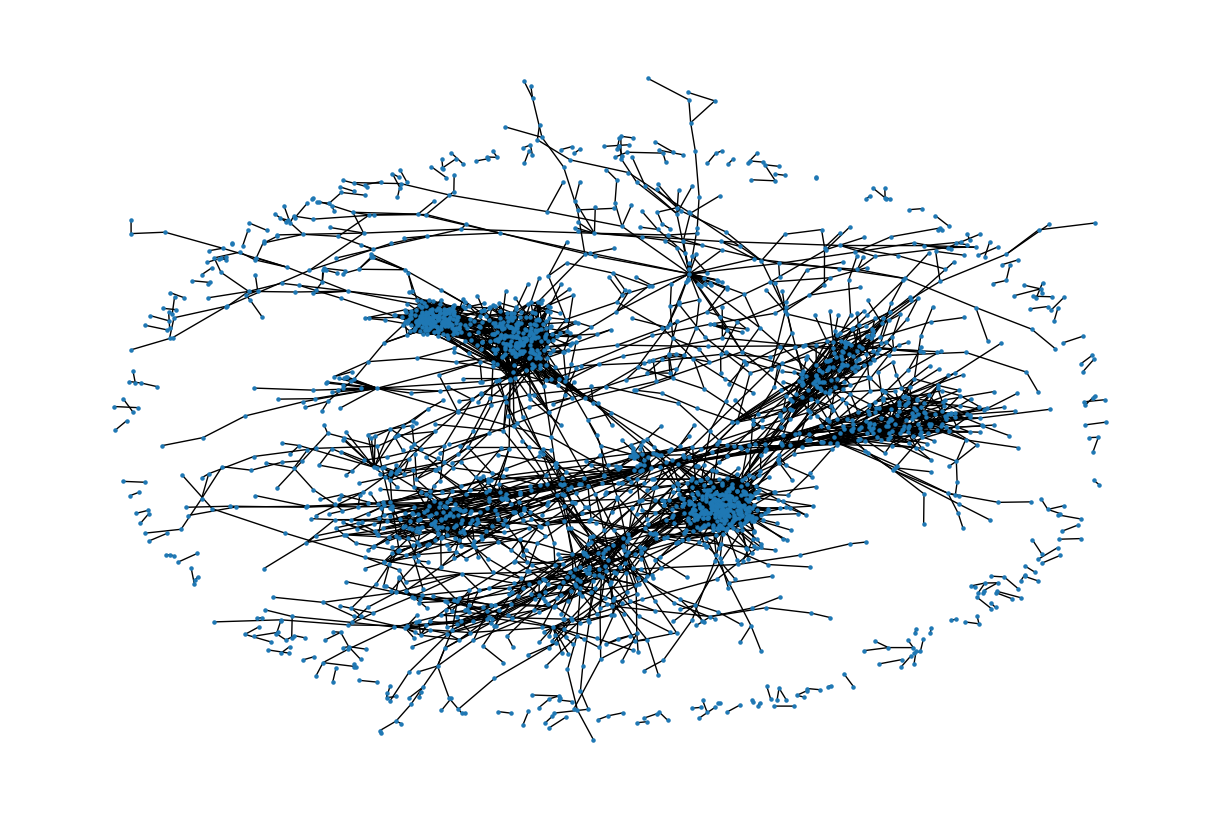

In [46]:
plt.figure(figsize=(12, 8))
nx.draw_spring(G,
               with_labels=False,
               node_size=5)
plt.show()

In [24]:
nx.has_bridges(G)

True

In [25]:
nx.is_connected(G)

False

In [26]:
# nx.node_connected_component

In [49]:
print(len(list(nx.local_bridges(G))))

4271


#### Number of components

In [27]:
nx.number_connected_components(G)

158

#### Number of nodes

In [28]:
G.number_of_edges()
G.number_of_nodes()

2831

#### Degree (Top 20)

In [29]:
G_degree = list(G.degree())

sorted_degree = sorted(G_degree, key=lambda x: x[1], reverse=True)

for node, degree in sorted_degree[:20]:
    print(f"Node: {node}, \t Degree: {degree}")

Node: 107, 	 Degree: 57
Node: 1912, 	 Degree: 47
Node: 1684, 	 Degree: 47
Node: 3437, 	 Degree: 38
Node: 0, 	 Degree: 21
Node: 1888, 	 Degree: 20
Node: 2543, 	 Degree: 20
Node: 1663, 	 Degree: 20
Node: 2047, 	 Degree: 19
Node: 2347, 	 Degree: 18
Node: 1833, 	 Degree: 18
Node: 2064, 	 Degree: 18
Node: 2244, 	 Degree: 18
Node: 2266, 	 Degree: 17
Node: 2124, 	 Degree: 17
Node: 1199, 	 Degree: 17
Node: 2131, 	 Degree: 16
Node: 2123, 	 Degree: 16
Node: 2118, 	 Degree: 16
Node: 1938, 	 Degree: 16


#### Cliques (Top 20)

In [30]:
G_cliques = nx.number_of_cliques(G)

sorted_cliques = sorted(G_cliques.items(), key=lambda x: x[1], reverse=True)

for node, clique in sorted_cliques[:20]:
    print(f"Node: {node}, \t Number of cliques: {clique}")

Node: 107, 	 Number of cliques: 54
Node: 1684, 	 Number of cliques: 45
Node: 1912, 	 Number of cliques: 42
Node: 3437, 	 Number of cliques: 35
Node: 0, 	 Number of cliques: 20
Node: 2543, 	 Number of cliques: 19
Node: 2047, 	 Number of cliques: 19
Node: 1888, 	 Number of cliques: 17
Node: 1663, 	 Number of cliques: 17
Node: 1833, 	 Number of cliques: 17
Node: 2347, 	 Number of cliques: 16
Node: 1199, 	 Number of cliques: 16
Node: 2244, 	 Number of cliques: 16
Node: 2206, 	 Number of cliques: 15
Node: 2289, 	 Number of cliques: 15
Node: 2266, 	 Number of cliques: 15
Node: 2007, 	 Number of cliques: 15
Node: 1086, 	 Number of cliques: 15
Node: 1352, 	 Number of cliques: 15
Node: 2229, 	 Number of cliques: 14


#### Triangles (Top 20)

In [31]:
G_triangles = nx.triangles(G)

sorted_triangles = sorted(G_triangles.items(), key=lambda x: x[1], reverse=True)

for node, triangle in sorted_triangles[:50]:
    print(f"Node: {node}, \t Number of triangles: {triangle}")

Node: 1912, 	 Number of triangles: 9
Node: 2395, 	 Number of triangles: 8
Node: 2188, 	 Number of triangles: 8
Node: 2564, 	 Number of triangles: 7
Node: 2229, 	 Number of triangles: 7
Node: 2124, 	 Number of triangles: 7
Node: 2276, 	 Number of triangles: 7
Node: 2064, 	 Number of triangles: 7
Node: 1888, 	 Number of triangles: 6
Node: 2131, 	 Number of triangles: 6
Node: 2369, 	 Number of triangles: 6
Node: 1663, 	 Number of triangles: 5
Node: 3437, 	 Number of triangles: 5
Node: 2602, 	 Number of triangles: 5
Node: 2123, 	 Number of triangles: 5
Node: 2088, 	 Number of triangles: 5
Node: 2386, 	 Number of triangles: 5
Node: 2506, 	 Number of triangles: 5
Node: 1938, 	 Number of triangles: 5
Node: 2359, 	 Number of triangles: 5
Node: 1612, 	 Number of triangles: 5
Node: 1621, 	 Number of triangles: 5
Node: 2430, 	 Number of triangles: 5
Node: 2142, 	 Number of triangles: 4
Node: 2370, 	 Number of triangles: 4
Node: 2410, 	 Number of triangles: 4
Node: 2590, 	 Number of triangles: 4
N

#### Betweenness (Top 20)

In [32]:
G_betweenness = nx.betweenness_centrality(G)

In [33]:
sorted_betweenness = sorted(G_betweenness.items(), key=lambda x: x[1], reverse=True)

for node, betweeneness in sorted_betweenness[:20]:
    print(f"Node: {node}, \t Betweenness: {betweeneness}")

top_20_betweenness = sorted_betweenness[:20]

Node: 107, 	 Betweenness: 0.21113742020464557
Node: 1465, 	 Betweenness: 0.12924621562831615
Node: 1684, 	 Betweenness: 0.11259938135701003
Node: 1912, 	 Betweenness: 0.10161931906098585
Node: 1577, 	 Betweenness: 0.08255608724017847
Node: 1666, 	 Betweenness: 0.08235544924492862
Node: 1835, 	 Betweenness: 0.07567420432797592
Node: 1405, 	 Betweenness: 0.07464819622544719
Node: 2869, 	 Betweenness: 0.06365315794156592
Node: 2742, 	 Betweenness: 0.059883138917232015
Node: 3366, 	 Betweenness: 0.05000404858322989
Node: 3406, 	 Betweenness: 0.04722977134535377
Node: 1280, 	 Betweenness: 0.04545755721989731
Node: 3136, 	 Betweenness: 0.04527532440532975
Node: 1674, 	 Betweenness: 0.04486712833812799
Node: 990, 	 Betweenness: 0.04424016412129086
Node: 538, 	 Betweenness: 0.043846774063356325
Node: 3027, 	 Betweenness: 0.037232907360145166
Node: 3341, 	 Betweenness: 0.036922188038499344
Node: 1126, 	 Betweenness: 0.026274687645653317


#### Plot Betweenness

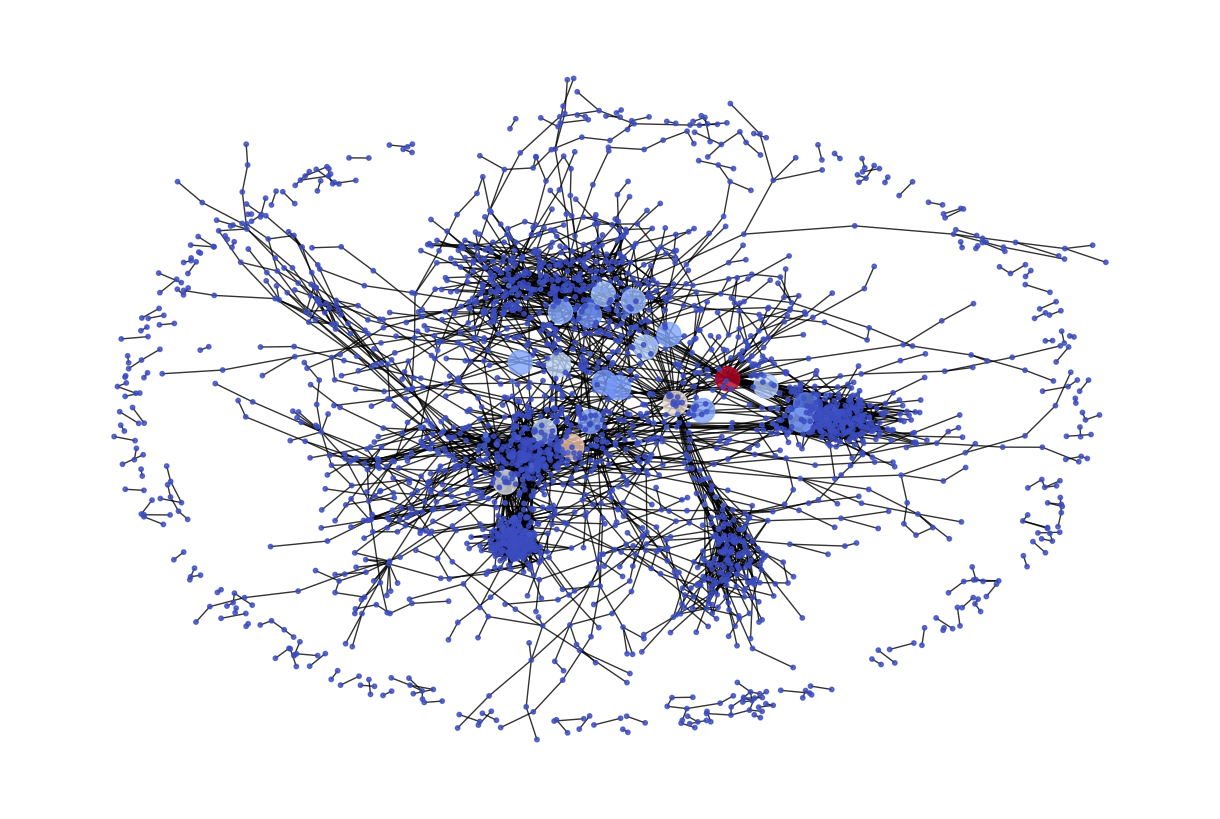

In [34]:
top_20_betweenness = [node for node, value in top_20_betweenness]
node_color = [G_betweenness[node] for node in G.nodes()]
node_size = [300 if node in top_20_betweenness else 10 for node in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw_spring(G,
               node_color=node_color,
               node_size=node_size,
               cmap=plt.cm.coolwarm,
               with_labels=False,
               alpha=0.8)

plt.show()

In [35]:
communities = community.girvan_newman(G)

communities

<generator object girvan_newman at 0x7f738723f1f0>

/tmp/ipykernel_86367/1838833031.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(communities_list))


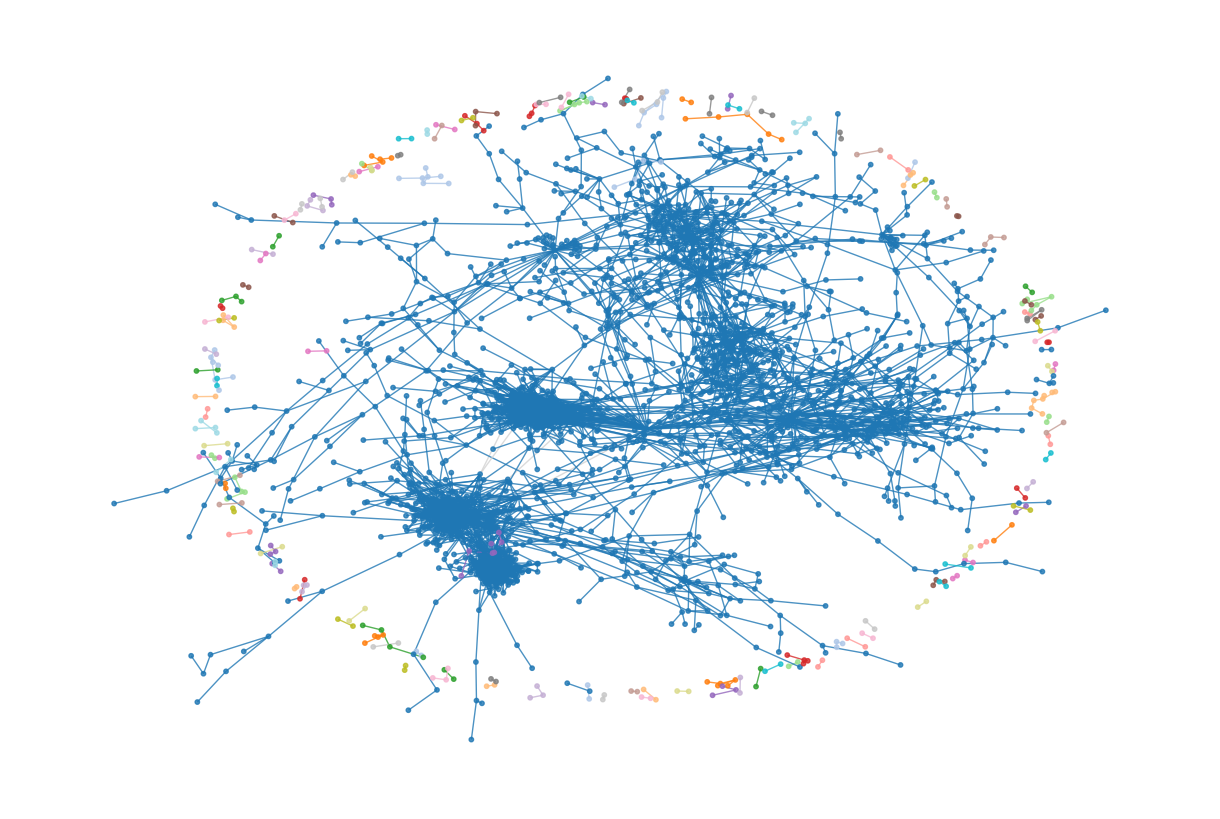

In [36]:
# Recreate communities generator since it was already consumed
communities_gen = community.girvan_newman(G)

# 1. Get the first level of community division
communities_list = next(communities_gen)

# 2. Create a mapping of node -> community index
node_community_map = {}
for i, comm in enumerate(communities_list):
    for node in comm:
        node_community_map[node] = i

# 3. Define colors for communities (using a colormap)
cmap = plt.cm.get_cmap('tab20', len(communities_list))

# 4. Determine edge colors
edge_colors = []
for u, v in G.edges():
    # If both nodes are in the same community, use that community's color
    if node_community_map.get(u) == node_community_map.get(v):
        comm_id = node_community_map[u]
        edge_colors.append(cmap(comm_id))
    else:
        # Edge between different communities -> Gray
        edge_colors.append("lightgray")

# 5. Determine node colors (optional, to match edges)
node_colors = [cmap(node_community_map.get(node)) for node in G.nodes()]

# 6. Plot
plt.figure(figsize=(12, 8))
nx.draw_spring(G,
               node_color=node_colors,
               edge_color=edge_colors,
               node_size=10,
               with_labels=False,
               alpha=0.8)
plt.show()

In [37]:
# Teilgraph
# Cliques von 107

H = G.copy()

H_sub = nx.make_max_clique_graph(H)
H_sub

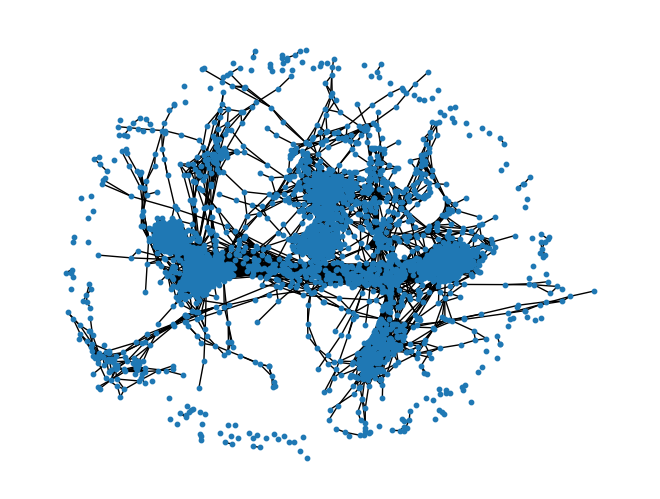

In [38]:
plt.Figure(figsize=(12,8))
nx.draw_spring(H_sub,
               node_size=10)

In [39]:
G = nx.complete_graph(5)

K5 = nx.convert_node_labels_to_integers(G, first_label=2)

G.add_edges_from(K5.edges())

c = list(nx.community.k_clique_communities(G, 4))

sorted(list(c[0]))
[0, 1, 2, 3, 4, 5, 6]

list(nx.community.k_clique_communities(G, 6))

[]

In [40]:
c = nx.community.k_clique_communities(G, 3)
# len(c)

H = nx.Graph()
H.add_edges_from(c)

NetworkXError: Edge tuple frozenset({0, 1, 2, 3, 4, 5, 6}) must be a 2-tuple or 3-tuple.

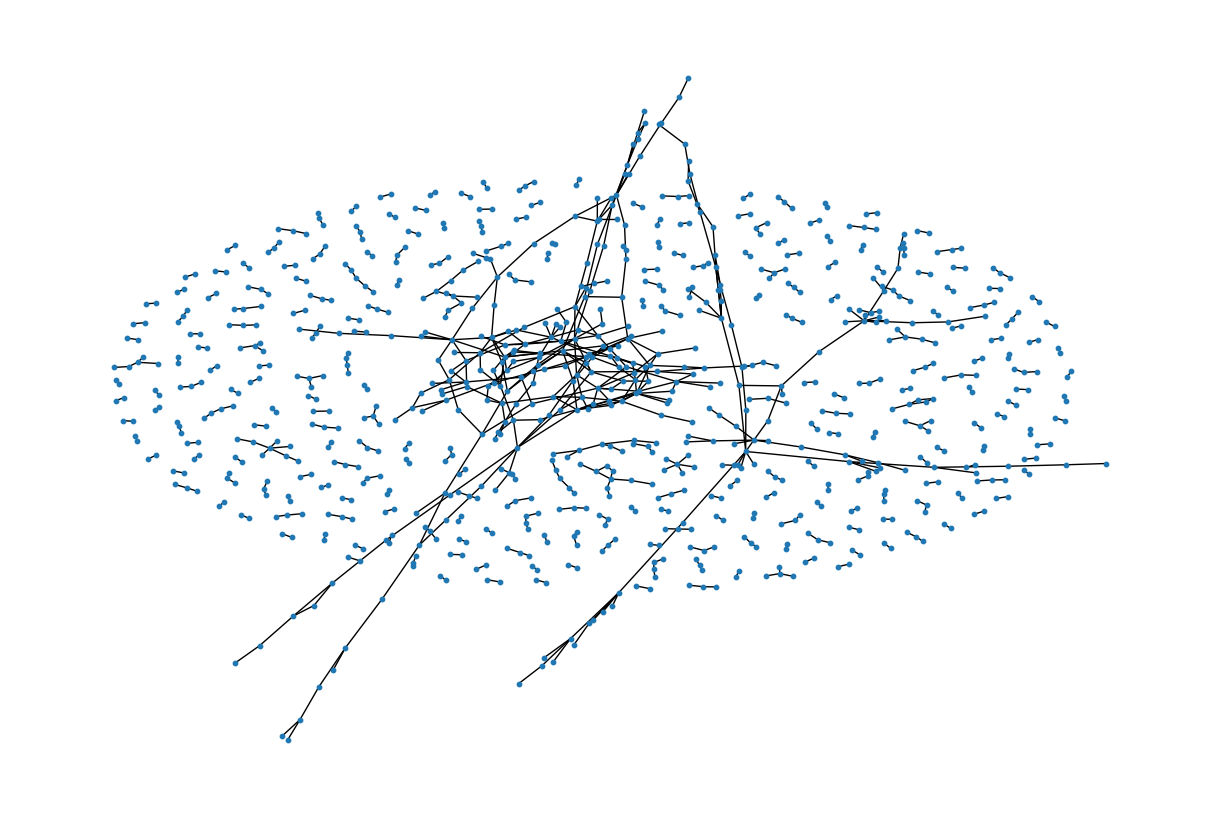

In [ ]:
plt.figure(figsize=(12,8))
nx.draw_spring(H, 
               node_size=10)

In [ ]:
bla = nx.find_cliques(G)

# sorted_triangles = sorted(G_triangles.items(), key=lambda x: x[1], reverse=True)


sorted_bla = (sorted(bla, reverse=True))

for i in sorted_bla:
    if len(i) > 2:
        # H.add_nodes_from(i)
        edges = [(i[0], i[1]), (i[1], i[2])]
        H.add_edges_from(edges)
        

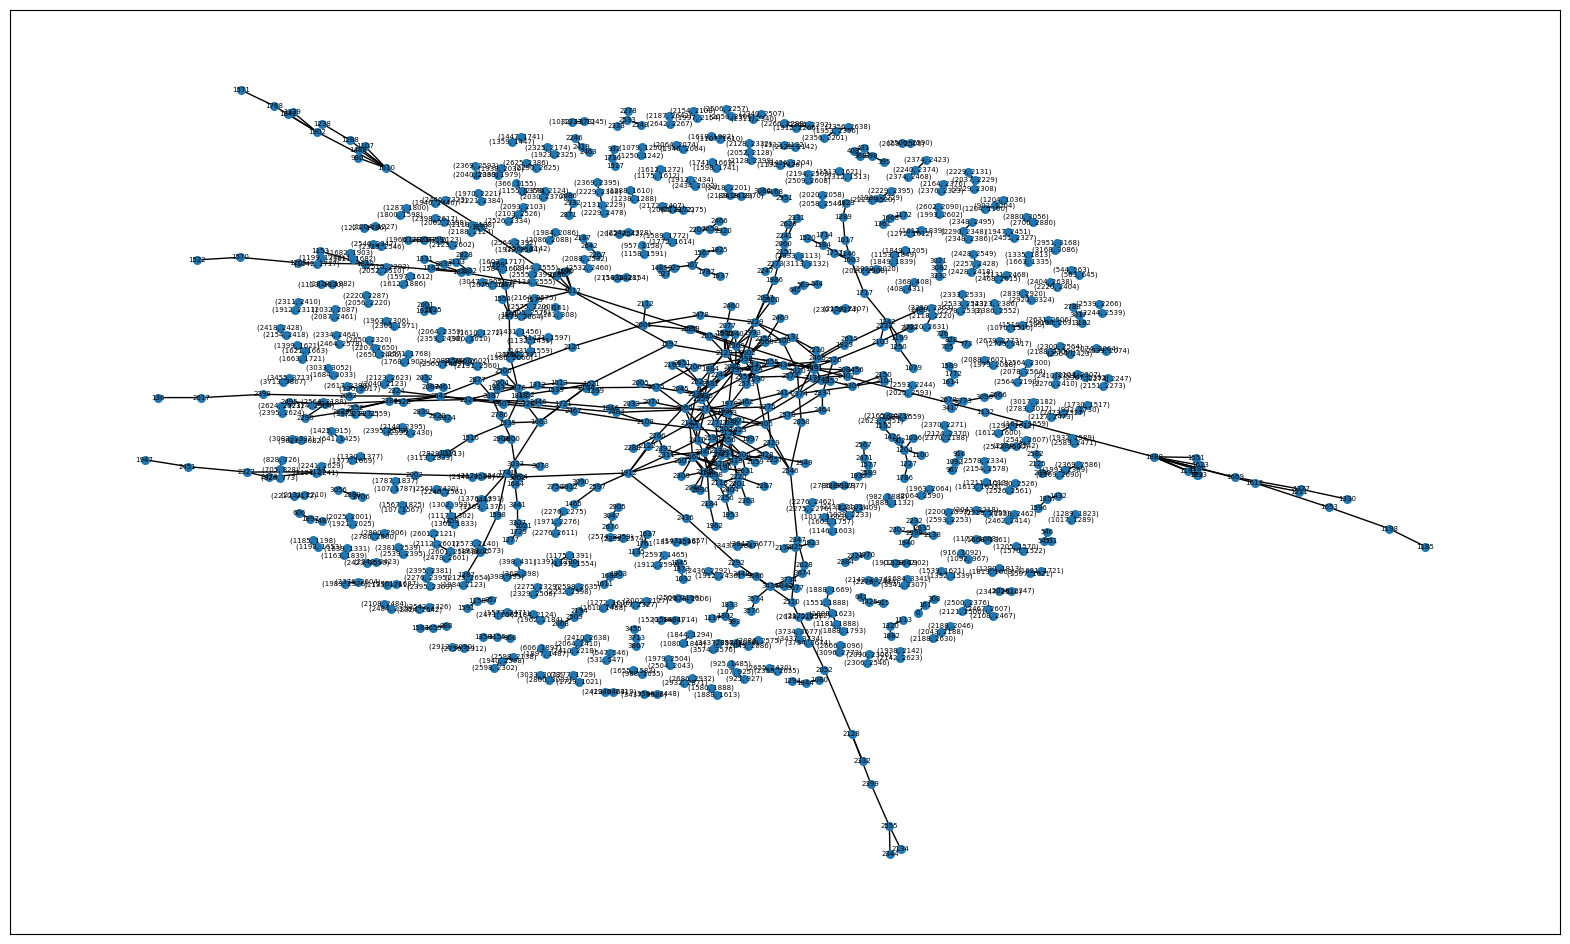

In [ ]:
pos = nx.spring_layout(H)
plt.figure(figsize=(20,12))
nx.draw_networkx(H,
                pos=pos,
            #    with_labels=True,
               font_size=5,
               node_size=30)

In [ ]:
H[107]

AtlasView({1787: {}, 1567: {}, 925: {}})

In [ ]:
H.number_of_nodes()

947

In [ ]:
H.number_of_edges()

755

In [ ]:
H[top_20_betweenness]

TypeError: unhashable type: 'list'

### DISKUSSION: Zusammenfassung & Interpretation
